In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/home/tapas/data/Dataset.csv')

In [48]:
del df['time_stamp']

In [49]:
#Make a copy of DF
df_tr = df

In [50]:
df_tr.head(5)

,Wattage,timeOfDay,Duration
0,100,Morning,30
1,120,Morning,27
2,104,Morning,25
3,105,Afternoon,15
4,109,Afternoon,35


In [51]:
#Transsform the timeOfDay to dummies
df_tr = pd.get_dummies(df_tr, columns=['timeOfDay'])

In [52]:
#Standardize
clmns = ['Wattage', 'Duration','timeOfDay_Afternoon', 'timeOfDay_Evening',
         'timeOfDay_Morning']
#df_tr[clmns] = df_tr.reindex(columns=clmns)

In [53]:
df_tr

,Wattage,Duration,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Morning
0,100,30,0,0,1
1,120,27,0,0,1
2,104,25,0,0,1
3,105,15,1,0,0
4,109,35,1,0,0
5,120,49,1,0,0
6,450,120,1,0,0
7,200,145,0,1,0
8,300,65,0,1,0
9,190,35,0,1,0


In [54]:
df_tr_std = stats.zscore(df_tr[clmns])

In [55]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_tr)
labels = kmeans.labels_

In [56]:
#Glue back to originaal data
df_tr['clusters'] = labels

In [57]:
#Add the column into our list
clmns.extend(['clusters'])

In [60]:
df_tr

,Wattage,Duration,timeOfDay_Afternoon,timeOfDay_Evening,timeOfDay_Morning,clusters
0,100,30,0,0,1,0
1,120,27,0,0,1,0
2,104,25,0,0,1,0
3,105,15,1,0,0,0
4,109,35,1,0,0,0
5,120,49,1,0,0,0
6,450,120,1,0,0,1
7,200,145,0,1,0,0
8,300,65,0,1,0,1
9,190,35,0,1,0,0


In [58]:
#Lets analyze the clusters
print df_tr[clmns].groupby(['clusters']).mean()
#This can tell us what are the differences between the clusters. It shows mean values of the attribute per
#each cluster

          Wattage  Duration  timeOfDay_Afternoon  timeOfDay_Evening  \
clusters                                                              
0           125.8      50.6                  0.3                0.4   
1           375.0      92.5                  0.5                0.5   

          timeOfDay_Morning  
clusters                     
0                       0.3  
1                       0.0  


Text(27.4851,0.5,'Duration')

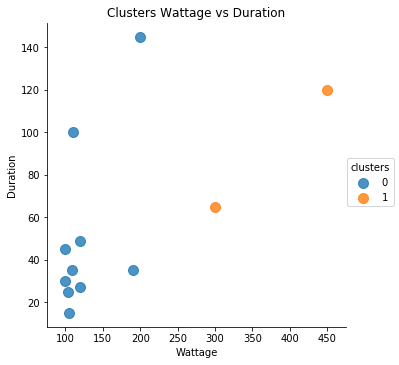

In [59]:
#Scatter plot of Wattage and Duration
sns.lmplot('Wattage', 'Duration', 
           data=df_tr, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Wattage vs Duration')
plt.xlabel('Wattage')
plt.ylabel('Duration')